## **Poisson distribution:**

A discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time (distance, area or volume).

 These events occur with a known constant mean rate : image.png

**Probability mass function:** 

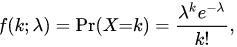

image.png

**Cumulative probability function:**


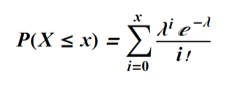

In [ ]:
#!/usr/bin/env python3
"new class"


class Poisson():
    "poisson distribution"
    def __init__(self, data=None, lambtha=1.):

        if data is None:
            self.lambtha = float(lambtha)
            if (lambtha <= 0):
                raise ValueError("lambtha must be a positive value")
        else:
            if type(data) is not list:
                raise TypeError("data must be a list")
            if (len(data) < 2):
                raise ValueError("data must contain multiple values")

            # Calculate the lambtha of data
            self.lambtha = sum(data) / len(data)

    # probability mass function
    def pmf(self, k):
        "Calculates the value of the PMF for a given number of “successes” "
        k = int(k)
        if k < 0:
            return 0

        e = 2.7182818285
        fact_k = 1
        for i in range(1, k + 1):
            fact_k *= i
        P = ((self.lambtha ** k) * (e ** (- self.lambtha))) / fact_k
        return P

    # cumulative distribution function
    def cdf(self, k):
        "Calculates the value of the CDF for a given number of “successes” "
        k = int(k)
        if k < 0:
            return 0

        e = 2.7182818285
        cdf = 0
        for i in range(k+1):
            fact_i = 1
            for j in range(1, i + 1):
                fact_i *= j
            
            cdf += ((self.lambtha ** i) * (e ** (- self.lambtha))) / fact_i
        return cdf


"""
# factorial
def fact(self, x):
  f = 1
  for i in range(1, x + 1):
      f *= i
  return f
"""

## **Exponential distribution:**

A probability distribution of the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate.





**Probability density function:**






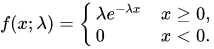

**Cumulative distribution function**



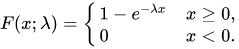


**The rate parameter λ is given by:**

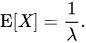

In [ ]:
#!/usr/bin/env python3
"new class"


class Exponential():
    "exponential distribution"
    def __init__(self, data=None, lambtha=1.):

        if data is None:
            self.lambtha = float(lambtha)
            if (lambtha <= 0):
                raise ValueError("lambtha must be a positive value")
        else:
            if type(data) is not list:
                raise TypeError("data must be a list")
            if (len(data) < 2):
                raise ValueError("data must contain multiple values")

            # Calculate the lambtha of data
            self.lambtha = len(data) / sum(data)

    # Probability density function
    def pdf(self, x):
        "Calculates the value of the PDF for a given time period "
        if x < 0:
            return 0

        e = 2.7182818285

        pdf = self.lambtha * (e ** (- self.lambtha * x))
        return pdf

    # cumulative distribution function
    def cdf(self, x):
        "Calculates the value of the CDF for a given time period"

        if x < 0:
            return 0

        e = 2.7182818285
        cdf = 1 - e ** (- self.lambtha * x)
        return cdf

## **Normal Distribution:**

A normal (or Gaussian) distribution is a type of continuous probability distribution for a real-valued random variable. 

The parameter image.png is the mean or expectation of the distribution (and also its median and mode), while the parameter image.png is its standard deviation. The variance of the distribution is image.png

**Probability density function**



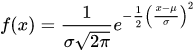




**Cumulative distribution function**




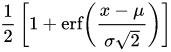

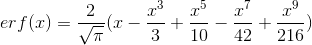

**Z-score**




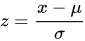

In [ ]:
#!/usr/bin/env python3
"new class"


class Normal():
    " normal distribution"
    def __init__(self, data=None, mean=0., stddev=1.):
        if data is None:
            if stddev <= 0:
                raise ValueError("stddev must be a positive value")
            self.mean = float(mean)
            self.stddev = float(stddev)
        else:
            if type(data) is not list:
                raise TypeError("data must be a list")
            if (len(data) < 2):
                raise ValueError("data must contain multiple values")
            # Calculate the mean and standard deviation of data
            self.mean = sum(data) / len(data)
            L = [(i - self.mean) ** 2 for i in data]
            self.stddev = (sum(L) / len(L)) ** (1 / 2)

    def z_score(self, x):
        "Calculates the z-score of a given x-value"
        z = (x - self.mean) / self.stddev
        return z

    def x_value(self, z):
        "Calculates the x-value of a given z-score"
        x = z * self.stddev + self.mean
        return x

    def pdf(self, x):
        "Calculates the value of the PDF for a given x-value"
        pi = 3.1415926536
        e = 2.7182818285
        c = self.stddev * ((2*pi) ** (1/2))
        pdf = (e ** ( - (self.z_score(x) ** 2) / 2)) / c
        return pdf

    def erf(self, x):
        "error function"
        pi = 3.1415926536
        c = (x - (x ** 3) / 3 + (x ** 5) / 10 - (x ** 7) / 42 + (x ** 9) / 216)
        return 2 * c / (pi ** (1 / 2))

    # cumulative distribution function
    def cdf(self, x):
        "Calculates the value of the CDF for a given x-value"
        c = self.z_score(x) / (2 ** (1 / 2))
        cdf = (1 + self.erf(c)) / 2
        return cdf




## **Binomial distribution:**

The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p).

**Probability density function**





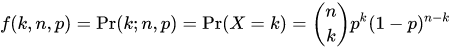

where : 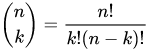

image.png

image.png


**Cumulative distribution function**



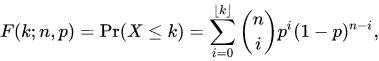

In [ ]:
#!/usr/bin/env python3
"new class"


class Binomial():
    "Binomial distribution"
    def __init__(self, data=None, n=1, p=0.5):

        if data is None:
            if (n <= 0):
                raise ValueError("n must be a positive value")
            if (p >= 1) or (p <= 0):
                raise ValueError("p must be greater than 0 and less than 1")
            self.n = int(n)
            self.p = float(p)
        else:
            if type(data) is not list:
                raise TypeError("data must be a list")
            if (len(data) < 2):
                raise ValueError("data must contain multiple values")

            # Calculate the n of p
            mean = sum(data) / len(data)
            var = sum([(i - mean) ** 2 for i in data]) / len(data)
            p = 1 - (var / mean)
            self.n = round(mean / p)
            self.p = mean / self.n

    # factorial
    def fact(self, x):
        f = 1
        for i in range(1, x + 1):
            f *= i
        return f

    # probability mass function
    def pmf(self, k):
        "Calculates the value of the PMF for a given number of “successes” "
        a = self.n - k
        c = self.fact(self.n) / (self.fact(k) * self.fact(a))
        pmf = c * (self.p ** k) * (1 - self.p) ** a
        return pmf

    # cumulative distribution function
    def cdf(self, k):
        "Calculates the value of the CDF for a given number of “successes” "
        k = int(k)
        L = [self.pmf(i) for i in range(k + 1)]
        return sum(L)


